Use k-component method to perform the post-processing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import trackml.dataset

## Load the data

In [4]:
data_dir = '/global/homes/x/xju/atlas/heptrkx/trackml_inputs/train_all'
black_list_dir = '/global/homes/x/xju/atlas/heptrkx/trackml_inputs/blacklist'

In [5]:
evtid = 6600
prefix = os.path.join(data_dir, 'event{:09d}'.format(evtid))
prefix_bl = os.path.join(black_list_dir, 'event{:09d}-blacklist_'.format(evtid))

In [6]:
hits_exclude = pd.read_csv(prefix_bl+'hits.csv')
particles_exclude = pd.read_csv(prefix_bl+'particles.csv')

In [7]:
hits, particles, truth = trackml.dataset.load_event(
    prefix, parts=['hits', 'particles', 'truth'])

In [8]:
hits = hits[~hits['hit_id'].isin(hits_exclude['hit_id'])]
particles = particles[~particles['particle_id'].isin(particles_exclude['particle_id'])]

In [9]:
hits.shape

(113668, 7)

In [10]:
particles.shape

(11170, 9)

In [11]:
tot_particles = particles.shape[0]

In [12]:
px = particles.px
py = particles.py
pt = np.sqrt(px**2 + py**2)
particles = particles.assign(pt=pt)

## remove particles that do not leave a hit

In [13]:
truth_particles = particles.merge(truth, on='particle_id', how='left')

In [14]:
reconstructable_particles = truth_particles[~np.isnan(truth_particles.weight)]

In [15]:
reconstructable_particles.shape

(95687, 18)

In [16]:
reconstructable_particles.head()

particle_id        vx        vy       vz        px       py       pz  \
0  4503668346847232 -0.024631 -0.000457  6.72595 -0.505992 -1.59523  1.72873   
1  4503668346847232 -0.024631 -0.000457  6.72595 -0.505992 -1.59523  1.72873   
2  4503668346847232 -0.024631 -0.000457  6.72595 -0.505992 -1.59523  1.72873   
3  4503668346847232 -0.024631 -0.000457  6.72595 -0.505992 -1.59523  1.72873   
4  4503668346847232 -0.024631 -0.000457  6.72595 -0.505992 -1.59523  1.72873   

   q  nhits        pt   hit_id         tx          ty          tz       tpx  \
0 -1     12  1.673555  20402.0  -9.643060  -30.945400   40.205601 -0.487816   
1 -1     12  1.673555  28815.0 -20.957300  -69.141403   81.379601 -0.462740   
2 -1     12  1.673555  35081.0 -32.765400 -111.283997  126.685997 -0.438239   
3 -1     12  1.673555  41335.0 -46.579102 -164.350006  183.412994 -0.404453   
4 -1     12  1.673555  41347.0 -47.028702 -166.154999  185.337006 -0.403087   

       tpy      tpz    weight  
0 -1.60070  1.72855  0.000039  
1 -1.60673  1.72910  0.000033  
2 -1.61292  1.72897  0.000028  
3 -1.62118  1.72873  0.000023  
4 -1.62212  1.72811  0.000020

In [17]:
len(np.unique(reconstructable_particles.particle_id))

9635

### remove particles with weight == 0, i.e. non-constructable particles

In [18]:
truth_particles = particles.merge(truth, on='particle_id', how='left')
non_recostructable_particles = truth_particles[truth_particles.weight.abs() < 1e-7]

In [19]:
recostructable_particles = truth_particles[~truth_particles['particle_id'].isin(np.unique(non_recostructable_particles.particle_id))]
recostructable_particles.shape

(95370, 18)

### remove noise hits
Their weights are zero

In [22]:
truth.head()

hit_id         particle_id         tx        ty      tz            tpx  \
0       1  418835796137607168 -62.044899  -8.80437 -1502.5      -0.275382   
1       2  211686362355597312 -56.781799   2.68623 -1502.5      -0.222526   
2       3  517920279339466752 -88.781898  -4.98339 -1502.5      -0.526577   
3       4  616995416692490240 -68.249702  -9.66492 -1502.5      -0.424269   
4       5                   0 -90.478897 -14.19510 -1502.5 -605192.000000   

             tpy           tpz    weight  
0      -0.019044      -6.58252  0.000010  
1       0.027606      -5.80354  0.000008  
2      -0.000612      -8.85540  0.000008  
3      -0.083626      -9.49401  0.000008  
4 -319191.000000 -729287.00000  0.000000

In [23]:
hits = hits.merge(truth, on='hit_id', how='left')
hits.shape

(113668, 15)

In [24]:
hits_no_noise = hits[hits['particle_id'] != 0]
hits_no_noise.shape

(95687, 15)

In [25]:
hits_with_noise = hits[hits['particle_id'] == 0]
hits_with_noise.shape

(17981, 15)

In [26]:
hits_with_noise.head()

hit_id           x         y       z  volume_id  layer_id  module_id  \
4        5  -90.476799 -14.19560 -1502.5          7         2          1   
12      13 -175.481995 -11.73980 -1502.0          7         2          2   
17      18 -160.253998  -7.88448 -1502.0          7         2          2   
25      26 -107.153999 -11.62250 -1498.0          7         2          3   
41      42  -49.432598 -11.50780 -1498.0          7         2          4   

    particle_id          tx        ty      tz            tpx            tpy  \
4             0  -90.478897 -14.19510 -1502.5 -605192.000000 -319191.000000   
12            0 -175.475006 -11.73800 -1502.0 -712801.000000 -141456.000000   
17            0 -160.263000  -7.88796 -1502.0   72055.101562  -10575.299805   
25            0 -107.153999 -11.61800 -1498.0  294730.000000  125584.000000   
41            0  -49.436001 -11.51160 -1498.0  151245.000000  171064.000000   

         tpz  weight  
4  -729287.0     0.0  
12 -686953.0     0.0  
17 -997345.0     0.0  
25 -947292.0     0.0  
41 -973582.0     0.0

In [27]:
tpx = hits_with_noise.tpx
tpy = hits_with_noise.tpy
tpt = np.sqrt(tpx**2 + tpy**2)
hits_with_noise = hits_with_noise.assign(tpt=tpt)

In [28]:
hits_with_noise.describe()

hit_id             x             y             z     volume_id  \
count   17981.000000  17981.000000  17981.000000  17981.000000  17981.000000   
mean    80274.559035     -0.540786     -3.569317      0.123575     13.449919   
std     28978.741168    468.733704    466.668091   1064.204956      3.363318   
min         5.000000  -1024.280029  -1025.170044  -2955.500000      7.000000   
25%     64379.000000   -303.970001   -305.723999   -623.400024     12.000000   
50%     87700.000000     -1.146870     -4.361710     -5.096170     13.000000   
75%    104625.000000    305.928986    297.334991    634.200012     17.000000   
max    113785.000000   1024.760010   1024.180054   2955.500000     18.000000   

           layer_id     module_id  particle_id            tx            ty  \
count  17981.000000  17981.000000      17981.0  17981.000000  17981.000000   
mean       5.429175    758.874701          0.0     -0.542579     -3.571928   
std        2.888482    780.108455          0.0    468.715485    466.671387   
min        2.000000      1.000000          0.0  -1024.280029  -1025.170044   
25%        4.000000     96.000000          0.0   -303.953003   -305.713013   
50%        4.000000    499.000000          0.0     -1.147760     -4.362890   
75%        8.000000   1198.000000          0.0    305.917999    297.229004   
max       14.000000   3189.000000          0.0   1024.750000   1024.180054   

                 tz            tpx            tpy             tpz   weight  \
count  17981.000000   17981.000000   17981.000000    17981.000000  17981.0   
mean       0.144708     925.832031   -4909.362793      155.381348      0.0   
std     1064.201538  496425.687500  489968.843750   716604.125000      0.0   
min    -2955.500000 -999889.000000 -999427.000000 -1000000.000000      0.0   
25%     -625.870972 -360422.000000 -358939.000000  -727708.000000      0.0   
50%       -3.561310    1769.390015   -4065.520020      855.784973      0.0   
75%      633.414001  355648.000000  344786.000000   728940.000000      0.0   
max     2955.500000  999899.000000  999801.000000  1000000.000000      0.0   

                tpt  
count  1.798100e+04  
mean   6.323655e+05  
std    2.943186e+05  
min    7.221105e+01  
25%    3.822332e+05  
50%    6.851878e+05  
75%    9.107042e+05  
max    1.000000e+06

pT distribution of noise hits

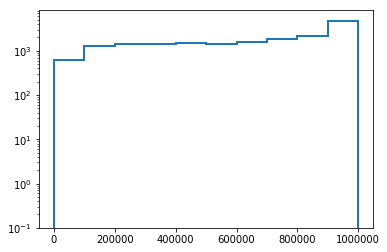

In [29]:
fig, ax = plt.subplots()
vals, bins, _ = ax.hist(hits_with_noise['tpt'], histtype='step', lw=2, label='noise', log=True)

In [30]:
hits_no_noise = hits_no_noise.merge(particles, on='particle_id')
hits_no_noise.shape

(95687, 24)

In [31]:
import matplotlib.pyplot as plt

pT distribution of particles in this event

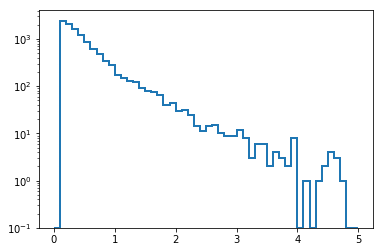

In [32]:
fig, ax = plt.subplots()
bins = np.linspace(0, 5, 51)
tot_vals, bins, _ = ax.hist(particles['pt'], bins=bins, histtype='step', lw=2, label='no-noise', log=True)

## Seletect hits at barrel layers

In [33]:
vlids = [(8,2), (8,4), (8,6), (8,8),
         (13,2), (13,4), (13,6), (13,8),
         (17,2), (17,4)]
n_det_layers = len(vlids)

# Select barrel layers and assign convenient layer number [0-9]
vlid_groups = hits_no_noise.groupby(['volume_id', 'layer_id'])
hits_barrel = pd.concat([vlid_groups.get_group(vlids[i]).assign(layer=i)
                  for i in range(n_det_layers)])

In [34]:
hits_barrel.shape

(47989, 25)

In [35]:
hits_barrel.head()

hit_id          x         y           z  volume_id  layer_id  module_id  \
211   16181 -31.937000  0.854461 -311.917999          8         2         48   
250   16588 -31.398800  1.605670 -271.118011          8         2         64   
278   15959 -31.528601  8.095710 -488.497009          8         2         16   
485   16011 -30.985100 -8.137190 -311.738007          8         2         33   
539   16200 -30.657700 -7.573420 -263.018005          8         2         49   

            particle_id         tx       ty  ...           vx         vy  \
211  418837307966095360 -31.937799  0.84008  ...     0.001866  -0.010319   
250  211690073207341056 -31.399300  1.59701  ...     0.018914   0.003020   
278  171140359252869120 -31.528799  8.09068  ...   -12.166900  11.274100   
485  103589732096671744 -30.986601 -8.13293  ...     0.005339   0.005712   
539  517919111108362240 -30.658199 -7.57199  ...    -0.007501   0.015426   

             vz        px        py        pz  q  nhits        pt  layer  
211   -1.984870 -0.321843  0.018488  -3.12345 -1     13  0.322374      0  
250   -0.489561 -0.670819  0.043316  -5.78108 -1     15  0.672216      0  
278 -311.657990 -0.249725 -0.035172  -2.26913 -1     15  0.252190      0  
485   -0.453590 -0.586576 -0.163658  -5.91685  1     10  0.608979      0  
539   10.662300 -1.357800 -0.345717 -12.14450  1     11  1.401121      0  

[5 rows x 25 columns]

In [36]:
barrel_particles = np.unique(hits_barrel['particle_id'])
tot_barrel_particles = len(barrel_particles)
print(tot_barrel_particles, "{:.3f}".format(tot_barrel_particles/tot_particles))

7492 0.671


In [52]:
np.savez("hello.npz", barrel_particles)

In [53]:
np.savez("hello_pt.npz", particles.pt.values)

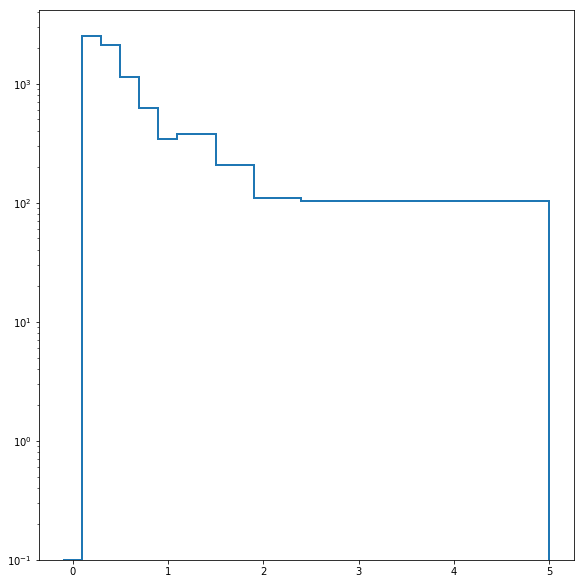

In [42]:
fontsize=16
minor_size=14
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)
bins = [-0.1, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.5, 1.9, 2.4, 5]
hist_configs = {
    'bins': bins,
    'histtype': 'step',
    'lw': 2,
    'log': True
}

bb_vals, bins, _ = plt.hist(particles[particles.particle_id.isin(barrel_particles)]['pt'], **hist_configs, label='barrel')

In [48]:
bb_vals

array([    0.,  2487.,  2092.,  1133.,   626.,   343.,   374.,   207.,
         110.,   104.])

In [44]:
bins

array([-0.1,  0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.5,  1.9,  2.4,  5. ])

In [46]:
_

<a list of 1 Patch objects>

In [51]:
sum(barrel_particles)

/global/common/cori/software/python/3.6-anaconda-5.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in long_scalars
  """Entry point for launching an IPython kernel.


7714113270454720522

In [37]:
barrel_particles[:10]

array([4503668346847232, 4503805785800704, 4503874505277440,
       4503943224754176, 4504011944230912, 4504286822137856,
       4504355541614592, 4504424261091328, 4504561700044800,
       4504630419521536])

In [35]:
n_particles = [0]*10 # 100%, 70%, 50%, >3 hits, =1, =2, =3
dict_pp = {"not-l0": []}
for pid in barrel_particles:
    hits_selected = hits_barrel[hits_barrel['particle_id'] == pid]
    hits_in_particles = truth[truth['particle_id'] == pid]
    if hits_in_particles.shape[0] == hits_selected.shape[0]:
        n_particles[0] += 1
    
    if hits_selected.shape[0] > 0.7 * hits_in_particles.shape[0]:
        n_particles[1] += 1
    
    if hits_selected.shape[0] > 0.5 * hits_in_particles.shape[0]:
        n_particles[2] += 1
    
    if hits_selected.shape[0] > 3:
        n_particles[3] += 1
        
    if hits_selected.shape[0] == 3:
        n_particles[4] += 1
    if hits_selected.shape[0] == 2:
        n_particles[5] += 1
    if hits_selected.shape[0] == 1:
        n_particles[6] += 1
        
    if 0 not in hits_selected['layer'].values:
        n_particles[7] += 1
        dict_pp['not-l0'].append(pid)
        
    if 1 not in hits_selected['layer'].values:
        n_particles[8] += 1

In [36]:
cuts = ['100%', '70%', '50%', '> 3', '= 1', '= 2', '= 3', 'not l0', 'not l1']
for ii, nn in enumerate(cuts):
    print("{}\t {}".format(nn, n_particles[ii]))

100%	 3227
70%	 4460
50%	 5223
> 3	 5152
= 1	 538
= 2	 873
= 3	 929
not l0	 1394
not l1	 2033


In [37]:
["{:.3f}".format(x/tot_particles) for x in n_particles]

['0.289',
 '0.399',
 '0.468',
 '0.461',
 '0.048',
 '0.078',
 '0.083',
 '0.125',
 '0.182',
 '0.000']

In [38]:
hits_barrel_no_layer0 = hits_barrel[hits_barrel['particle_id'].isin(dict_pp['not-l0'])]
hits_barrel_no_layer0.sort_values('particle_id').head(20)

hit_id           x           y           z  volume_id  layer_id  \
79384   71652 -259.860992   -8.876690  445.000000         13         2   
79385   78616 -356.455994   27.178400  496.399994         13         4   
79383   42454 -171.878998   -8.204190  401.989014          8         8   
79382   37075 -116.106003    7.871170  372.765991          8         6   
79275   42141 -170.925995  -26.903799  323.955994          8         8   
79274   42139 -169.029999  -26.202700  324.329987          8         8   
79277   77607 -353.656006  -47.982899  286.799988         13         4   
79279   89064 -638.539001  175.994995  211.399994         13         8   
79278   83608 -503.053009   10.018500  254.119995         13         6   
79276   71236 -252.380005  -48.439301  308.399994         13         2   
79272   36453 -116.739998   -1.077980  334.829010          8         6   
79273   36815 -114.974998   -0.083634  335.191986          8         6   
95481  103210 -768.526978 -288.924011  -65.199997         17         2   
95482  103215 -761.927002 -290.076996  -54.400002         17         2   
89867   78839 -314.377014  177.490005  653.400024         13         4   
94971   84740 -472.427002  159.641998  583.200012         13         6   
94973  105424 -734.411987  358.806000  672.400024         17         2   
94970   84737 -477.820007  161.998993  585.000000         13         6   
94972   90123 -617.281006  244.641006  629.400024         13         8   
94974  110256 -848.664978  566.288025  737.200012         17         4   

       module_id       particle_id          tx          ty  ...            vx  \
79384        561  4507035617988609 -259.859985   -8.865300  ...    -67.993401   
79385        896  4507035617988609 -356.459015   27.167999  ...    -67.993401   
79383        937  4507035617988609 -171.880005   -8.198800  ...    -67.993401   
79382        676  4507035617988609 -116.106003    7.872170  ...    -67.993401   
79275        861  4507035618004994 -170.923996  -26.911400  ...    -67.993401   
79274        860  4507035618004994 -169.035004  -26.184200  ...    -67.993401   
79277        730  4507035618004994 -353.654999  -48.009800  ...    -67.993401   
79279       1322  4507035618004994 -638.539978  175.992004  ...    -67.993401   
79278       1014  4507035618004994 -503.058990    9.987500  ...    -67.993401   
79276        522  4507035618004994 -252.380005  -48.429001  ...    -67.993401   
79272        573  4507035618004994 -116.738998   -1.082840  ...    -67.993401   
79273        624  4507035618004994 -114.974998   -0.084399  ...    -67.993401   
95481       1087  4507035634765825 -768.530029 -288.907013  ...   -468.915009   
95482       1088  4507035634765825 -761.950989 -289.976990  ...   -468.915009   
89867        948  4507035634769922 -314.388000  177.475998  ...   -468.915009   
94971       1323  4507035634774018 -472.428986  159.636993  ...   -468.915009   
94973       2152  4507035634774018 -734.431030  358.777008  ...   -468.915009   
94970       1322  4507035634774018 -477.816986  162.003998  ...   -468.915009   
94972       1728  4507035634774018 -617.286011  244.632004  ...   -468.915009   
94974       2722  4507035634774018 -848.684021  566.268005  ...   -468.915009   

               vy          vz        px        py        pz  q  nhits  \
79384   31.568300  345.247986 -0.143193 -0.088302  0.086228  1      4   
79385   31.568300  345.247986 -0.143193 -0.088302  0.086228  1      4   
79383   31.568300  345.247986 -0.143193 -0.088302  0.086228  1      4   
79382   31.568300  345.247986 -0.143193 -0.088302  0.086228  1      4   
79275   31.568300  345.247986 -0.175617 -0.138600 -0.039662  1      9   
79274   31.568300  345.247986 -0.175617 -0.138600 -0.039662  1      9   
79277   31.568300  345.247986 -0.175617 -0.138600 -0.039662  1      9   
79279   31.568300  345.247986 -0.175617 -0.138600 -0.039662  1      9   
79278   31.568300  345.247986 -0.175617 -0.138600 -0.039662  1      9   
79276   31.568300  3

### Remove duplicated Hits

In [39]:
x = hits_barrel.x
y = hits_barrel.y
r = np.sqrt(x**2 + y**2)
phi = np.arctan2(y, x)
hits_barrel = hits_barrel.assign(r=r, phi=phi)

In [40]:
hits_barrel_no_duplicate_hits = hits_barrel.loc[hits_barrel.groupby(['particle_id', 'layer'], as_index=False).r.idxmin()]

In [41]:
hits_barrel_no_duplicate_hits.shape

(38753, 27)

In [42]:
hits_barrel_no_duplicate_hits.shape[0]/hits_barrel.shape[0]

0.8075392277396903

In [43]:
n_particles = [0]*10 # 100%, 70%, 50%, >3 hits, =1, =2, =3
dict_pp = {
    "not-l0": [],
    "=1": []
}
for pid in barrel_particles:
    hits_selected = hits_barrel_no_duplicate_hits[hits_barrel_no_duplicate_hits['particle_id'] == pid]
    hits_in_particles = truth[truth['particle_id'] == pid]
    if hits_in_particles.shape[0] == hits_selected.shape[0]:
        n_particles[0] += 1
    
    if hits_selected.shape[0] > 0.7 * hits_in_particles.shape[0]:
        n_particles[1] += 1
    
    if hits_selected.shape[0] > 0.5 * hits_in_particles.shape[0]:
        n_particles[2] += 1
    
    if hits_selected.shape[0] > 3:
        n_particles[3] += 1
        
    if hits_selected.shape[0] == 3:
        n_particles[4] += 1
    if hits_selected.shape[0] == 2:
        n_particles[5] += 1
    if hits_selected.shape[0] == 1:
        n_particles[6] += 1
        dict_pp['=1'].append(pid)
        
    if 0 not in hits_selected['layer'].values:
        n_particles[7] += 1
        dict_pp['not-l0'].append(pid)
        
    if 1 not in hits_selected['layer'].values:
        n_particles[8] += 1

In [44]:
cuts = ['100%', '70%', '50%', '> 3', '= 1', '= 2', '= 3', 'not l0', 'not l1']
for ii, nn in enumerate(cuts):
    print("{}\t {}".format(nn, n_particles[ii]))

100%	 957
70%	 3164
50%	 4570
> 3	 4821
= 1	 386
= 2	 1119
= 3	 1166
not l0	 1394
not l1	 2033


In [45]:
particle_with_one_hit = dict_pp['=1'][0]

In [46]:
hits_barrel_nodup_nolayer0 = hits_barrel_no_duplicate_hits[hits_barrel_no_duplicate_hits['particle_id'].isin(dict_pp['not-l0'])]
hits_barrel_nodup_nolayer0.sort_values(['particle_id', 'layer']).head(20)

hit_id           x           y           z  volume_id  layer_id  \
79382   37075 -116.106003    7.871170  372.765991          8         6   
79383   42454 -171.878998   -8.204190  401.989014          8         8   
79384   71652 -259.860992   -8.876690  445.000000         13         2   
79385   78616 -356.455994   27.178400  496.399994         13         4   
79273   36815 -114.974998   -0.083634  335.191986          8         6   
79274   42139 -169.029999  -26.202700  324.329987          8         8   
79276   71236 -252.380005  -48.439301  308.399994         13         2   
79277   77607 -353.656006  -47.982899  286.799988         13         4   
79278   83608 -503.053009   10.018500  254.119995         13         6   
79279   89064 -638.539001  175.994995  211.399994         13         8   
95482  103215 -761.927002 -290.076996  -54.400002         17         2   
89867   78839 -314.377014  177.490005  653.400024         13         4   
94971   84740 -472.427002  159.641998  583.200012         13         6   
94972   90123 -617.281006  244.641006  629.400024         13         8   
94973  105424 -734.411987  358.806000  672.400024         17         2   
94974  110256 -848.664978  566.288025  737.200012         17         4   
93268   70577  150.817001  207.145996  145.600006         13         2   
93269   77049  265.029999  242.375000  133.000000         13         4   
93270   83095  448.101990  221.218002  113.199997         13         6   
93272   88637  655.392029   -3.064770   78.400002         13         8   

       module_id       particle_id          tx          ty    ...     \
79382        676  4507035617988609 -116.106003    7.872170    ...      
79383        937  4507035617988609 -171.880005   -8.198800    ...      
79384        561  4507035617988609 -259.859985   -8.865300    ...      
79385        896  4507035617988609 -356.459015   27.167999    ...      
79273        624  4507035618004994 -114.974998   -0.084399    ...      
79274        860  4507035618004994 -169.035004  -26.184200    ...      
79276        522  4507035618004994 -252.380005  -48.429001    ...      
79277        730  4507035618004994 -353.654999  -48.009800    ...      
79278       1014  4507035618004994 -503.058990    9.987500    ...      
79279       1322  4507035618004994 -638.539978  175.992004    ...      
95482       1088  4507035634765825 -761.950989 -289.976990    ...      
89867        948  4507035634769922 -314.388000  177.475998    ...      
94971       1323  4507035634774018 -472.428986  159.636993    ...      
94972       1728  4507035634774018 -617.286011  244.632004    ...      
94973       2152  4507035634774018 -734.431030  358.777008    ...      
94974       2722  4507035634774018 -848.684021  566.268005    ...      
93268        467  4507173056942081  150.813004  207.149994    ...      
93269        651  4507173056942081  265.024994  242.382996    ...      
93270        903  4507173056942081  448.102997  221.216995    ...      
93272       1174  4507173056942081  655.383972   -3.133610    ...      

               vz        px        py        pz  q  nhits        pt  layer  \
79382  345.247986 -0.143193 -0.088302  0.086228  1      4  0.168230      2   
79383  345.247986 -0.143193 -0.088302  0.086228  1      4  0.168230      3   
79384  345.247986 -0.143193 -0.088302  0.086228  1      4  0.168230      4   
79385  345.247986 -0.143193 -0.088302  0.086228  1      4  0.168230      5   
79273  345.247986 -0.175617 -0.138600 -0.039662  1      9  0.223721      2   
79274  345.247986 -0.175617 -0.138600 -0.039662  1      9  0.223721      3   
79276  345.247986 -0.175617 -0.138600 -0.039662  1      9  0.223721      4   
79277  345.247986 -0.175617 -0.138600 -0.039662  1      9  0.223721      5   
79278  345.247986 -0.175617 -0.138600 -0.039662  1      9  0.223721      6   
79279  345.247986 -0.175617 -0.138600 -0.039662  1      9  0.223721      7   
95482  582.179016  0.092782 -0.150139 -0.166171  1      2  0.176494      8   
898

In [47]:
hits_barrel[hits_barrel['particle_id'] == 4507035634769922]

hit_id           x           y           z  volume_id  layer_id  \
89867   78839 -314.377014  177.490005  653.400024         13         4   

       module_id       particle_id       tx          ty    ...             vz  \
89867        948  4507035634769922 -314.388  177.475998    ...     582.179016   

             px        py        pz  q  nhits        pt  layer           r  \
89867  0.147296  0.064804  0.071765  1      3  0.160921      5  361.020233   

            phi  
89867  2.627627  

[1 rows x 27 columns]

### Make pairs

In [48]:
gid_keys = 'layer'
n_det_layers = 10
gid_start = np.arange(0, n_det_layers-1)
gid_end = np.arange(1, n_det_layers)

In [49]:
print(gid_start)
print(gid_end)

[0 1 2 3 4 5 6 7 8]
[1 2 3 4 5 6 7 8 9]


In [50]:
def cal_deta(hitpair):
    r1 = hitpair.r_1
    r2 = hitpair.r_2
    z1 = hitpair.z_1
    z2 = hitpair.z_2
    
    R1 = np.sqrt(r1**2 + z1**2)
    R2 = np.sqrt(r2**2 + z2**2)
    theta1 = np.arccos(z1/R1)
    theta2 = np.arccos(z2/R2)
#     theta1 = np.arctan(r1/z1)
#     theta2 = np.arctan(r2/z2)
    eta1 = -np.log(np.tan(theta1/2.0))
    eta2 = -np.log(np.tan(theta2/2.0))
    return eta1 - eta2

def calc_dphi(phi1, phi2):
    """Computes phi2-phi1 given in range [-pi,pi]"""
    dphi = phi2 - phi1
    dphi[dphi > np.pi] -= 2*np.pi
    dphi[dphi < -np.pi] += 2*np.pi
    return dphi

In [51]:
hits_barrel_no_duplicate_hits = hits_barrel_no_duplicate_hits.assign(evtid=evtid)

### Number of hits not in adjacent layers

In [52]:
hits_barrel_no_duplicate_hits.head()

hit_id          x           y           z  volume_id  layer_id  \
47472   20402  -9.644350  -30.945299   40.206699          8         2   
47473   28815 -20.955299  -69.141701   81.374001          8         4   
47474   35081 -32.765400 -111.283997  126.690002          8         6   
47475   41335 -46.580502 -164.350006  183.408997          8         8   
47477   71311 -66.118301 -249.014008  273.000000         13         2   

       module_id       particle_id         tx          ty  ...          px  \
47472        116  4503668346847232  -9.643060  -30.945400  ...   -0.505992   
47473        263  4503668346847232 -20.957300  -69.141403  ...   -0.505992   
47474        427  4503668346847232 -32.765400 -111.283997  ...   -0.505992   
47475        718  4503668346847232 -46.579102 -164.350006  ...   -0.505992   
47477        529  4503668346847232 -66.138298 -249.005997  ...   -0.505992   

            py       pz  q  nhits        pt  layer           r       phi  \
47472 -1.59523  1.72873 -1     12  1.673555      0   32.413345 -1.872914   
47473 -1.59523  1.72873 -1     12  1.673555      1   72.247482 -1.865074   
47474 -1.59523  1.72873 -1     12  1.673555      2  116.007324 -1.857136   
47475 -1.59523  1.72873 -1     12  1.673555      3  170.823502 -1.846976   
47477 -1.59523  1.72873 -1     12  1.673555      4  257.642395 -1.830328   

       evtid  
47472   6600  
47473   6600  
47474   6600  
47475   6600  
47477   6600  

[5 rows x 28 columns]

In [53]:
from postprocess import utils_fit

In [54]:
n_not_in_adjacent_layers = 0
n_not_in_adjacent_layers_particles = 0
pps = np.unique(hits_barrel_no_duplicate_hits['particle_id'])
broken_tracks = []
for pp in pps:
    layer_info = hits_barrel_no_duplicate_hits[hits_barrel_no_duplicate_hits['particle_id'] == pp]['layer'].values
    layer_info = list(np.sort(layer_info))
    layer_pairs = utils_fit.pairwise(layer_info)
    is_broken = False
    for b,a in layer_pairs:
        if abs(a-b) != 1:
            n_not_in_adjacent_layers += 1
            is_broken = True
    if is_broken:
        n_not_in_adjacent_layers_particles += 1
        broken_tracks.append(pp)

In [55]:
print(n_not_in_adjacent_layers, n_not_in_adjacent_layers_particles)

902 892


In [56]:
a = [9]
bb = utils_fit.pairwise(a)
print(list(bb))

[]


In [57]:
hits_barrel_no_duplicate_hits.shape

(38753, 28)

In [58]:
hits_barrel_no_duplicate_hits.head()

hit_id          x           y           z  volume_id  layer_id  \
47472   20402  -9.644350  -30.945299   40.206699          8         2   
47473   28815 -20.955299  -69.141701   81.374001          8         4   
47474   35081 -32.765400 -111.283997  126.690002          8         6   
47475   41335 -46.580502 -164.350006  183.408997          8         8   
47477   71311 -66.118301 -249.014008  273.000000         13         2   

       module_id       particle_id         tx          ty  ...          px  \
47472        116  4503668346847232  -9.643060  -30.945400  ...   -0.505992   
47473        263  4503668346847232 -20.957300  -69.141403  ...   -0.505992   
47474        427  4503668346847232 -32.765400 -111.283997  ...   -0.505992   
47475        718  4503668346847232 -46.579102 -164.350006  ...   -0.505992   
47477        529  4503668346847232 -66.138298 -249.005997  ...   -0.505992   

            py       pz  q  nhits        pt  layer           r       phi  \
47472 -1.59523  1.72873 -1     12  1.673555      0   32.413345 -1.872914   
47473 -1.59523  1.72873 -1     12  1.673555      1   72.247482 -1.865074   
47474 -1.59523  1.72873 -1     12  1.673555      2  116.007324 -1.857136   
47475 -1.59523  1.72873 -1     12  1.673555      3  170.823502 -1.846976   
47477 -1.59523  1.72873 -1     12  1.673555      4  257.642395 -1.830328   

       evtid  
47472   6600  
47473   6600  
47474   6600  
47475   6600  
47477   6600  

[5 rows x 28 columns]

In [59]:
ss = hits_barrel_no_duplicate_hits.groupby('particle_id')[['layer']].apply(lambda x: np.any(x.isin([0])))

In [60]:
ss[~ss].shape

(1394,)

In [61]:
ss[ss].shape

(6098,)

In [62]:
ss.shape

(7492,)

In [63]:
def create_segments(hits, gid_start, gid_end, gid_keys='layer'):
    segments = []
    hit_gid_groups = hits.groupby(gid_keys)

    # Loop over geometry ID pairs
    for gid1, gid2 in zip(gid_start, gid_end):
        hits1 = hit_gid_groups.get_group(gid1)
        hits2 = hit_gid_groups.get_group(gid2)

        # Join all hit pairs together
        hit_pairs = pd.merge(
            hits1.reset_index(), hits2.reset_index(),
            how='inner', on='evtid', suffixes=('_1', '_2'))

        # Calculate coordinate differences
        dphi = calc_dphi(hit_pairs.phi_1, hit_pairs.phi_2)
        dz = hit_pairs.z_2 - hit_pairs.z_1
        dr = hit_pairs.r_2 - hit_pairs.r_1
        phi_slope = dphi / dr
        z0 = hit_pairs.z_1 - hit_pairs.r_1 * dz / dr
        deta = cal_deta(hit_pairs)

        # Identify the true pairs
        y = (hit_pairs.particle_id_1 == hit_pairs.particle_id_2) & (hit_pairs.particle_id_1 != 0)

        # Put the results in a new dataframe
        df_pairs = hit_pairs[['evtid', 'index_1', 'index_2', 'hit_id_1', 'hit_id_2', 'layer_1', 'layer_2']].assign(dphi=dphi, dz=dz, dr=dr, y=y, phi_slope=phi_slope, z0=z0, deta=deta)
        print('processed:', gid1, gid2, "True edges {} and Fake Edges {}".format(df_pairs[df_pairs['y']==True].shape[0], df_pairs[df_pairs['y']==False].shape[0]))
        segments.append(df_pairs)
    return segments

In [64]:
%%time
segments = create_segments(hits_barrel_no_duplicate_hits, gid_start, gid_end, gid_keys=gid_keys)

processed: 0 1 True edges 5154 and Fake Edges 33283828
processed: 1 2 True edges 4405 and Fake Edges 24872258
processed: 2 3 True edges 3680 and Fake Edges 17344819
processed: 3 4 True edges 3595 and Fake Edges 18456548
processed: 4 5 True edges 4127 and Fake Edges 20672009
processed: 5 6 True edges 3411 and Fake Edges 14941909
processed: 6 7 True edges 2644 and Fake Edges 9439826
processed: 7 8 True edges 1943 and Fake Edges 5588107
processed: 8 9 True edges 1400 and Fake Edges 2996975
CPU times: user 2min 28s, sys: 1min 35s, total: 4min 3s
Wall time: 3min 11s


In [65]:
pd_segments = pd.concat(segments, ignore_index=True)

In [66]:
pd_segments.head(1)

evtid  index_1  index_2  hit_id_1  hit_id_2  layer_1  layer_2     dphi  \
0   6600    47472    47473     20402     28815        0        1  0.00784   

          dz         dr     y  phi_slope        z0      deta  
0  41.167301  39.834137  True   0.000197  6.708546  0.073666

In [67]:
pd_segments.shape

(147626638, 14)

In [68]:
true_edges = pd_segments[pd_segments['y'] == True]

In [69]:
true_edges.shape

(30359, 14)

In [70]:
hits_barrel_no_duplicate_hits.shape

(38753, 28)

In [71]:
hits_barrel_no_duplicate_hits.head(1)

hit_id        x          y          z  volume_id  layer_id  module_id  \
47472   20402 -9.64435 -30.945299  40.206699          8         2        116   

            particle_id       tx       ty  ...          px       py       pz  \
47472  4503668346847232 -9.64306 -30.9454  ...   -0.505992 -1.59523  1.72873   

       q  nhits        pt  layer          r       phi  evtid  
47472 -1     12  1.673555      0  32.413345 -1.872914   6600  

[1 rows x 28 columns]

In [72]:
true_edges.head(1)

evtid  index_1  index_2  hit_id_1  hit_id_2  layer_1  layer_2     dphi  \
0   6600    47472    47473     20402     28815        0        1  0.00784   

          dz         dr     y  phi_slope        z0      deta  
0  41.167301  39.834137  True   0.000197  6.708546  0.073666

### Build a graph using true information
I want to see if my wrangler could fully reconstruct the tracks using true information!

In [74]:
import networkx as nx

In [75]:
%%time
graph = nx.Graph()

hits_id_dict = {}
for idx in range(n_nodes):
    hit_id = int(hits_barrel_no_duplicate_hits.iloc[idx]['hit_id'])
    graph.add_node(idx, 
                   pos=hits_barrel_no_duplicate_hits.iloc[idx][['r', 'phi', 'z']],
                   hit_id=hit_id,
                   solution=[0.0])
    hits_id_dict[hit_id] = idx

CPU times: user 45.1 s, sys: 2.83 s, total: 47.9 s
Wall time: 47.9 s


In [76]:
%%time
for idx in range(n_edges):
    in_hit_idx  = int(true_edges.iloc[idx]['hit_id_1'])
    out_hit_idx = int(true_edges.iloc[idx]['hit_id_2'])

    in_node_idx  = hits_id_dict[in_hit_idx]
    out_node_idx = hits_id_dict[out_hit_idx]

    solution = [1.]
    graph.add_edge(out_node_idx, in_node_idx, solution=solution)

CPU times: user 13.2 s, sys: 264 ms, total: 13.5 s
Wall time: 13.5 s


In [77]:
from postprocess import wrangler, analysis

In [239]:
%%time
all_true_tracks = wrangler.get_tracks(graph, feature_name='solution', with_fit=False)

CPU times: user 2min 53s, sys: 5.24 s, total: 2min 58s
Wall time: 2min 58s


In [240]:
true_df = analysis.graphs_to_df(all_true_tracks)

In [241]:
total_particles = np.unique(true_df.merge(truth, on='hit_id', how='left')['particle_id'])
print(len(total_particles))

7492


In [242]:
res_truth = analysis.summary_on_prediction(graph, hits_barrel_no_duplicate_hits, true_df)

In [146]:
def print_info(res_pred):
    print("Correct {}, Wrong {}, Isolated {}, Broken {}, Connected {}".format(res_pred['n_correct'], res_pred['n_wrong'], len(res_pred['isolated_pids']), len(res_pred['broken_pids']), len(res_pred['connected_pids'])))

In [250]:
print_info(res_truth)

Correct 6600, Wrong 892, Isolated 27, Broken 697, Connected 195


### Build a graph using selected segements

In [95]:
selected_segments = pd_segments[ (pd_segments.phi_slope.abs() < 0.0006) & (pd_segments.z0.abs() < 100) ]

In [96]:
selected_segments.shape

(183945, 14)

In [102]:
selected_true_segments = selected_segments[selected_segments['y']==True]

In [119]:
selected_true_segments.shape

(13309, 14)

In [103]:
selected_true_segments.shape[0]/true_edges.shape[0]

0.43838729865937615

In [104]:
%%time
n_nodes = hits_barrel_no_duplicate_hits.shape[0]
n_edges_sel = selected_true_segments.shape[0]

graph_sel = nx.Graph()

hits_id_dict = {}
for idx in range(n_nodes):
    hit_id = int(hits_barrel_no_duplicate_hits.iloc[idx]['hit_id'])
    graph_sel.add_node(idx, 
                   pos=hits_barrel_no_duplicate_hits.iloc[idx][['r', 'phi', 'z']],
                   hit_id=hit_id,
                   solution=[0.0])
    hits_id_dict[hit_id] = idx

CPU times: user 45.3 s, sys: 3.28 s, total: 48.6 s
Wall time: 48.6 s


In [105]:
%%time
for idx in range(n_edges_sel):
    in_hit_idx  = int(selected_true_segments.iloc[idx]['hit_id_1'])
    out_hit_idx = int(selected_true_segments.iloc[idx]['hit_id_2'])

    in_node_idx  = hits_id_dict[in_hit_idx]
    out_node_idx = hits_id_dict[out_hit_idx]

    solution = [1.]
    graph_sel.add_edge(out_node_idx, in_node_idx, solution=solution)

CPU times: user 4.48 s, sys: 79.4 ms, total: 4.56 s
Wall time: 4.56 s


In [164]:
def get_corrected_trks(nx_G, truth, hits_in_question, feature_name='solution'):
    all_true_tracks = wrangler.get_tracks(nx_G, feature_name=feature_name, with_fit=False)
    true_df = analysis.graphs_to_df(all_true_tracks)
    n_total_predictions = len(np.unique(true_df['track_id']))
    print("total predictions:", n_total_predictions)
    res_truth = analysis.summary_on_prediction(nx_G, hits_in_question, true_df)
    return res_truth

In [ ]:
n_fully_connected_trks = get_corrected_trks(graph_sel, truth, hits_barrel_no_duplicate_hits)

In [109]:
print_info(n_fully_connected_trks)

Correct 3114, Wrong 4378, Isolated 3558, Broken 4306, Connected 72


### Split selected segments into eta and phi regions

In [78]:
eta_range = (-5, 5)
phi_range = (-np.pi, np.pi)
n_phi_sections = 8
n_eta_sections = 2
phi_edges = np.linspace(*phi_range, num=n_phi_sections+1)
eta_edges = np.linspace(*eta_range, num=n_eta_sections+1)

In [79]:
ihit = hits_barrel_no_duplicate_hits

In [80]:
ihit.head(1)

hit_id        x          y          z  volume_id  layer_id  module_id  \
47472   20402 -9.64435 -30.945299  40.206699          8         2        116   

            particle_id       tx       ty  ...          px       py       pz  \
47472  4503668346847232 -9.64306 -30.9454  ...   -0.505992 -1.59523  1.72873   

       q  nhits        pt  layer          r       phi  evtid  
47472 -1     12  1.673555      0  32.413345 -1.872914   6600  

[1 rows x 28 columns]

In [81]:
ihit.shape

(38753, 28)

In [82]:
theta = np.arctan2(ihit.r, ihit.z)
eta = -1*np.log(np.tan(theta/2.))
ihit = ihit.assign(eta=eta)
ihit.head(1)

hit_id        x          y          z  volume_id  layer_id  module_id  \
47472   20402 -9.64435 -30.945299  40.206699          8         2        116   

            particle_id       tx       ty    ...          py       pz  q  \
47472  4503668346847232 -9.64306 -30.9454    ...    -1.59523  1.72873 -1   

       nhits        pt  layer          r       phi  evtid       eta  
47472     12  1.673555      0  32.413345 -1.872914   6600  1.041605  

[1 rows x 29 columns]

In [83]:
hits_sections = []

for i, (phi_min,phi_max) in enumerate(utils_fit.pairwise(phi_edges)):
    phi_hits = ihit[(ihit.phi > phi_min) & (ihit.phi < phi_max)]
    centered_phi = phi_hits.phi - (phi_min + phi_max) / 2.

    phi_hits = phi_hits.assign(phi=centered_phi, phi_section=i)
    for j, (eta_min, eta_max) in enumerate(utils_fit.pairwise(eta_edges)):
        sec_hits = phi_hits[(phi_hits.eta > eta_min) & (phi_hits.eta < eta_max)]
        sec_hits = sec_hits.assign(
            r=sec_hits['r'],
            z=sec_hits['z'])
        hits_sections.append(sec_hits)

In [84]:
feature_scale = np.array([1000., np.pi / n_phi_sections, 1000.])
feature_names = ['r', 'phi', 'z']
l = np.arange(n_det_layers)
layer_pairs = np.stack([l[:-1], l[1:]], axis=1)

In [85]:
from prepare_hitsgraph import construct_graph

In [86]:
hitsgraphs = [construct_graph(section_hits, layer_pairs,
                              phi_slope_max=0.0006, z0_max=100,
                              feature_names=feature_names, feature_scale=feature_scale)
             for section_hits in hits_sections]

In [87]:
from datasets.graph import load_graph

In [88]:
hits_graph_dir = '/global/homes/x/xju/atlas/heptrkx/data/hitgraphs_big_000/event{:09d}_g{:03d}.npz'
hits_graphID_dir = '/global/homes/x/xju/atlas/heptrkx/data/hitgraphs_big_000/event{:09d}_g{:03d}_ID.npz'

In [89]:
for ii, hitsgraph in enumerate(hitsgraphs):
    G = load_graph(hits_graph_dir.format(evtid, ii))
    print(ii, "mine:", hitsgraph[0].Ri.shape, "steve:", G.Ri.shape)

0 mine: (2393, 9617) steve: (2396, 9642)
1 mine: (2346, 9383) steve: (2349, 9421)
2 mine: (2289, 8915) steve: (2291, 8935)
3 mine: (2328, 9000) steve: (2328, 9000)
4 mine: (2405, 9858) steve: (2414, 9970)
5 mine: (2405, 9714) steve: (2411, 9780)
6 mine: (2378, 9889) steve: (2383, 9919)
7 mine: (2459, 9861) steve: (2466, 9916)
8 mine: (2501, 10237) steve: (2507, 10253)
9 mine: (2444, 9966) steve: (2447, 10008)
10 mine: (2503, 10823) steve: (2507, 10843)
11 mine: (2410, 10305) steve: (2425, 10447)
12 mine: (2518, 10254) steve: (2518, 10254)
13 mine: (2550, 11160) steve: (2559, 11237)
14 mine: (2360, 9741) steve: (2362, 9745)
15 mine: (2464, 10474) steve: (2466, 10505)


In [90]:
saved_hitsgraphs = []
for ii in range(16):
    G = load_graph(hits_graph_dir.format(evtid, ii))
    with np.load(hits_graphID_dir.format(evtid, ii)) as f:
        hit_ids = pd.DataFrame(f["ID"], columns=['hit_id'])
    saved_hitsgraphs += [((G, hit_ids), )]

### What is the total tracks that can be constructed with splitted graphs? Total is 3114 if not splitted

In [ ]:
splitted_segments = [create_segments(section_hits, gid_start, gid_end) for section_hits in hits_sections]

In [122]:
merged_splitted_segments = pd.concat([item for sublist in splitted_segments for item in sublist], ignore_index=True)

In [123]:
merged_splitted_segments.shape

(9239826, 14)

In [124]:
merged_splitted_segments.head(1)

evtid  index_1  index_2  hit_id_1  hit_id_2  layer_1  layer_2      dphi  \
0   6600    29164    29165     18190     25925        0        1  0.045688   

          dz         dr     y  phi_slope        z0      deta  
0 -74.682297  39.262421  True   0.001164  6.066746  0.051655

In [125]:
splitted_selected_segments = merged_splitted_segments[ (merged_splitted_segments.phi_slope.abs() < 0.0006) & (merged_splitted_segments.z0.abs() < 100) ]

In [126]:
splitted_selected_segments.shape

(159197, 14)

In [127]:
splitted_selected_true_segments = merged_splitted_segments[ (merged_splitted_segments['y']==True) & (merged_splitted_segments.phi_slope.abs() < 0.0006) & (merged_splitted_segments.z0.abs() < 100) ]

In [128]:
splitted_selected_true_segments.shape

(12724, 14)

In [129]:
def df_to_nx(hits, segments, in_name='hit_id_1', out_name='hit_id_2'):

    n_nodes = hits.shape[0]
    n_edges = segments.shape[0]

    graph = nx.Graph()

    hits_id_dict = {}
    for idx in range(n_nodes):
        hit_id = int(hits.iloc[idx]['hit_id'])
        graph.add_node(idx, 
                       pos=hits.iloc[idx][['r', 'phi', 'z']],
                       hit_id=hit_id,
                       solution=[0.0])
        hits_id_dict[hit_id] = idx
        
    for idx in range(n_edges):
        in_hit_idx  = int(segments.iloc[idx][in_name])
        out_hit_idx = int(segments.iloc[idx][out_name])

        in_node_idx  = hits_id_dict[in_hit_idx]
        out_node_idx = hits_id_dict[out_hit_idx]

        solution = [1.]
        graph.add_edge(out_node_idx, in_node_idx, solution=solution)
        
    return graph

In [130]:
%%time
nx_G_splitted = df_to_nx(hits_barrel_no_duplicate_hits, splitted_selected_true_segments)

CPU times: user 47.2 s, sys: 2.59 s, total: 49.8 s
Wall time: 49.8 s


In [144]:
%%time
n_trks_with_split = get_corrected_trks(nx_G_splitted, truth, hits_barrel_no_duplicate_hits)

CPU times: user 10min 38s, sys: 3.23 s, total: 10min 41s
Wall time: 10min 41s


In [147]:
print_info(n_trks_with_split)

Correct 2668, Wrong 4824, Isolated 3570, Broken 4457, Connected 367


### Start GNN's prediction on the splitted graphs

In [91]:
config_file = '../configs/nxgraph_default.yaml'
input_ckpt = '../trained_results/nxgraph_big_007/bak'
iteration = 89908

In [107]:
import tensorflow as tf

from nx_graph import utils_io, prepare, get_model, utils_data
from graph_nets import utils_np, utils_tf

In [93]:
import yaml

ckpt_name = 'checkpoint_{:05d}.ckpt'

def load_config(config_file):
    with open(config_file) as f:
        return yaml.load(f)

In [94]:
config = utils_io.load_config(config_file)

In [95]:
config_tr = config['train']
batch_size = n_graphs   = config_tr['batch_size']   # need optimization
num_processing_steps_tr = config_tr['n_iters']      ## level of message-passing
prod_name = config['prod_name']
if input_ckpt is None:
    input_ckpt = os.path.join(config['output_dir'], prod_name)
    
generate_input_target = prepare.inputs_generator(config['data']['output_nxgraph_dir'], n_train_fraction=0.8)

Total Events: 7000 with 16 sections, total 112000 files 
Training data: [0, 5599] events, total 89600 files
Testing data:  [5600, 7000] events, total 22400 files
Training and testing graphs are selected randomly from their corresponding pools


In [96]:
tf.reset_default_graph()
model = get_model(config['model']['name'])

input_graphs, target_graphs = generate_input_target(n_graphs)
input_ph  = utils_tf.placeholders_from_data_dicts(input_graphs, force_dynamic_num_graphs=True)
target_ph = utils_tf.placeholders_from_data_dicts(target_graphs, force_dynamic_num_graphs=True)

output_ops_tr = model(input_ph, num_processing_steps_tr)

In [97]:
try:
    sess.close()
except NameError:
    pass

sess = tf.Session()
saver = tf.train.Saver()
if iteration < 0:
    saver.restore(sess, tf.train.latest_checkpoint(input_ckpt))
else:
    saver.restore(sess, os.path.join(input_ckpt, 'checkpoint_{:05d}.ckpt'.format(iteration)))

INFO:tensorflow:Restoring parameters from ../trained_results/nxgraph_big_007/bak/checkpoint_89908.ckpt


In [98]:
def calc_dphi2(phi1, phi2):
    """Computes phi2-phi1 given in range [-pi,pi]"""
    dphi = phi2 - phi1
    if dphi > np.pi:
        dphi -= 2*np.pi
    if dphi < -np.pi:
        dphi += 2*np.pi
    return dphi

In [99]:
def get_edge_features(in_node, out_node):
    # input are the features of incoming and outgoing nodes
    # they are ordered as [r, phi, z]
    in_r, in_phi, in_z    = in_node
    out_r, out_phi, out_z = out_node

    in_r3 = np.sqrt(in_r**2 + in_z**2)
    out_r3 = np.sqrt(out_r**2 + out_z**2)

    in_theta = np.arccos(in_z/in_r3)
    in_eta = -np.log(np.tan(in_theta/2.0))
    out_theta = np.arccos(out_z/out_r3)
    out_eta = -np.log(np.tan(out_theta/2.0))
    deta = out_eta - in_eta
    dphi = calc_dphi2(out_phi, in_phi)
    dR = np.sqrt(deta**2 + dphi**2)
    dZ = in_z - out_z
    return np.array([deta, dphi, dR, dZ])

In [100]:
def hitsgraph_to_nx(GG, use_digraph=True, bidirection=False):
    G, G_ID = GG
    n_nodes, n_edges = G.Ri.shape

    graph = nx.DiGraph() if use_digraph else nx.Graph()

    for i in range(n_nodes):
        graph.add_node(i, pos=G.X[i],
                       hit_id=G_ID.iloc[i],
                       solution=[0.0])

    for iedge in range(n_edges):
        """
        In_node:  node is a receiver, hits at outer-most layers can only be In-node
        Out-node: node is a sender, so hits in inner-most layer can only be Out-node
        """
        in_node_id  = G.Ri[:, iedge].nonzero()[0][0]
        out_node_id = G.Ro[:, iedge].nonzero()[0][0]
        solution = [G.y[iedge]]
        
        f1 = graph.node[out_node_id]['pos']
        f2 = graph.node[in_node_id]['pos']
        edge_features = {'distance':get_edge_features(f2, f1)}
        graph.add_edge(out_node_id, in_node_id, solution=solution, **edge_features)
        if bidirection:
#             edge_features = utils_data.get_edge_features(f2, f1)
            graph.add_edge(in_node_id, out_node_id, solution=solution, **edge_features)

    # add global features, not used for now
    graph.graph['features'] = np.array([0.])
    return graph

In [101]:
nx_graphs = [hitsgraph_to_nx(G, bidirection=True) for G in hitsgraphs]

In [102]:
input_nx_graphs = []
target_nx_graphs = []
for nx_g in nx_graphs:
    ig, tg = prepare.graph_to_input_target(nx_g)
    input_nx_graphs.append(ig)
    target_nx_graphs.append(tg)

In [103]:
input_graphs = utils_np.networkxs_to_graphs_tuple(input_nx_graphs)
target_graphs = utils_np.networkxs_to_graphs_tuple(target_nx_graphs)

In [104]:
feed_dict = {
    input_ph: input_graphs, 
    target_ph: target_graphs
}

predictions = sess.run({
    "outputs": output_ops_tr,
    "target": target_ph
}, feed_dict=feed_dict)

In [105]:
output = predictions['outputs'][-1]

In [108]:
predicted_graphs = utils_data.predicted_graphs_to_nxs(output, input_graphs, target_graphs, bidirection=False)

total_graphs 16


In [109]:
from nx_graph import utils_plot

In [110]:
import sklearn.metrics
fontsize=16
minor_size=14
def plot_metrics2(odd, tdd, odd_th=0.5, tdd_th=0.5, outname='roc_graph_nets.eps'):
    y_pred, y_true = (odd > odd_th), (tdd > tdd_th)
    accuracy  = sklearn.metrics.accuracy_score(y_true, y_pred)
    precision = sklearn.metrics.precision_score(y_true, y_pred)
    recall    = sklearn.metrics.recall_score(y_true, y_pred)

    print('Accuracy:            %.4f' % accuracy)
    print('Precision (purity):  %.4f' % precision)
    print('Recall (efficiency): %.4f' % recall)

    fpr, tpr, _ = sklearn.metrics.roc_curve(y_true, odd)


    fig, axs = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)
    axs = axs.flatten()
    ax0, ax1, ax2, ax3 = axs

    # Plot the model outputs
    # binning=dict(bins=50, range=(0,1), histtype='step', log=True)
    binning=dict(bins=50, histtype='step', log=True)
    ax0.hist(odd[y_true==False], lw=2, label='fake', **binning)
    ax0.hist(odd[y_true], lw=2, label='true', **binning)
    ax0.set_xlabel('Model output', fontsize=fontsize)
    ax0.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)
    ax0.legend(loc=0, fontsize=fontsize)

    # Plot the ROC curve
    auc = sklearn.metrics.auc(fpr, tpr)
    ax1.plot(fpr, tpr, lw=2)
    ax1.plot([0, 1], [0, 1], '--', lw=2)
    ax1.set_xlabel('False positive rate', fontsize=fontsize)
    ax1.set_ylabel('True positive rate', fontsize=fontsize)
    ax1.set_title('ROC curve, AUC = %.4f' % auc, fontsize=fontsize)
    ax1.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)

    p, r, t = sklearn.metrics.precision_recall_curve(y_true, odd)
    ax2.plot(t, p[:-1], label='purity', lw=2)
    ax2.plot(t, r[:-1], label='efficiency', lw=2)
    ax2.set_xlabel('Cut on model score', fontsize=fontsize)
    ax2.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)
    ax2.legend(fontsize=fontsize)

    ax3.plot(p, r, lw=2)
    ax3.set_xlabel('Purity', fontsize=fontsize)
    ax3.set_ylabel('Efficiency', fontsize=fontsize)
    ax3.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)

    plt.savefig(outname)

Accuracy:            0.9934
Precision (purity):  0.9577
Recall (efficiency): 0.9592


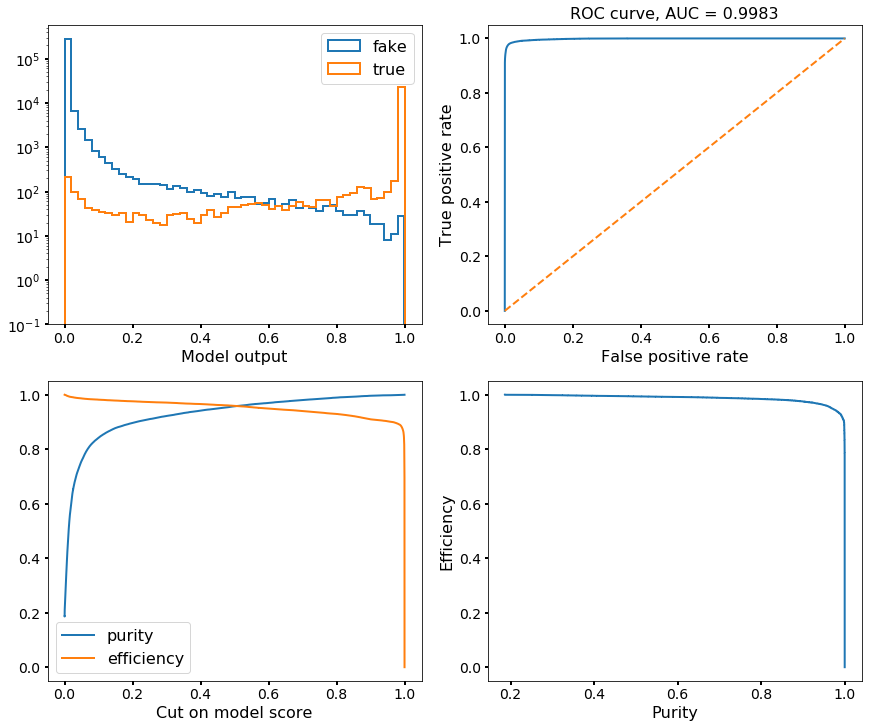

In [111]:
weights_ = []
truths_ = []
for G in predicted_graphs:
    weights_ += [G.edges[edge]['predict'][0] for edge in G.edges()]
    truths_  += [G.edges[edge]['solution'][0] for edge in G.edges()]

    
weights_ = np.array(weights_)
truths_ = np.array(truths_)
plot_metrics2(weights_, truths_, odd_th=0.5)

In [114]:
for input_nx_graph, predicted_graph in zip(input_nx_graphs, predicted_graphs):
    n_nodes_input = len(input_nx_graph.nodes())
    n_nodes_predict = len(predicted_graph.nodes())
    if n_nodes_input == n_nodes_predict:
        for inode in range(n_nodes_input):
            predicted_graph.node[inode].update(hit_id=input_nx_graph.node[inode]['hit_id'])
    else:
        print("Not the same")

In [252]:
predicted_graphs[0].node[0]

{'pos': array([ 0.81527752, -0.07366344, -0.0544    ]), 'hit_id': 103215}

In [253]:
all_predicted_nodes = sum([len(gg.nodes()) for gg in predicted_graphs])

In [254]:
print(all_predicted_nodes, hits_barrel_no_duplicate_hits.shape[0])

38753 38753


In [255]:
all_predicted_edges = sum([len(gg.edges()) for gg in predicted_graphs])

In [256]:
print(all_predicted_edges, splitted_selected_segments.shape[0])

318394 159197


In [257]:
predicted_graphs[0].edges[(0, 801)]

{'solution': array([0.]), 'predict': array([5.84421066e-06])}

In [112]:
def nx_to_pandas(nx_G):
    df_nodes = pd.DataFrame([(ii, nx_G.node[ii]['hit_id']) for ii in nx_G.nodes()],
                            columns=['node_idx', 'hit_id'])
    df_edges = pd.DataFrame([(ii, nx_G.node[ff[0]]['hit_id'], nx_G.node[ff[1]]['hit_id'], ff[2]['predict'][0], ff[2]['solution'][0]) 
                             for ii, ff in enumerate(nx_G.edges(data=True))],
                            columns=['edge_idx', 'sender', 'receiver', 'predict', 'solution'])
    return df_nodes, df_edges

In [115]:
segments_with_prediction = [nx_to_pandas(jj)[1] for jj in predicted_graphs]

In [116]:
merged_segments_with_prediction = pd.concat(segments_with_prediction, ignore_index=True)

In [261]:
merged_segments_with_prediction.head(1)

edge_idx  sender  receiver  predict  solution
0         0  103215     87841  0.02781       0.0

In [117]:
def df_to_nx2(hits, segments, in_name='hit_id_1', out_name='hit_id_2'):

    n_nodes = hits.shape[0]
    n_edges = segments.shape[0]

    graph = nx.Graph()

    hits_id_dict = {}
    for idx in range(n_nodes):
        hit_id = int(hits.iloc[idx]['hit_id'])
        graph.add_node(idx, 
                       pos=hits.iloc[idx][['r', 'phi', 'z']],
                       hit_id=hit_id,
                       solution=[0.0])
        hits_id_dict[hit_id] = idx
        
    for idx in range(n_edges):
        in_hit_idx  = int(segments.iloc[idx][in_name])
        out_hit_idx = int(segments.iloc[idx][out_name])

        in_node_idx  = hits_id_dict[in_hit_idx]
        out_node_idx = hits_id_dict[out_hit_idx]

        graph.add_edge(out_node_idx, in_node_idx,
                       solution=np.array([segments.iloc[idx]['solution']]),
                       predict=np.array([segments.iloc[idx]['predict']])
                      )
    return graph

In [ ]:
hits_after_split_graph = hits_barrel_no_duplicate_hits[hits_barrel_no_duplicate_hits['particle_id'].isin()]

In [118]:
merged_segments_with_prediction.shape

(318394, 5)

In [150]:
merged_segments_with_prediction.head(1)

edge_idx  sender  receiver  predict  solution
0         0  103215     87841  0.02781       0.0

In [148]:
### select segments that survives from above selections
particles_after_split_graph = n_trks_with_split['correct_pids']

In [149]:
hits_after_split_graph = hits_barrel_no_duplicate_hits[hits_barrel_no_duplicate_hits['particle_id'].isin(particles_after_split_graph)]

In [153]:
segments_with_prediction_after_split_graph = merged_segments_with_prediction[(merged_segments_with_prediction['sender'].isin(hits_after_split_graph['hit_id'].values)) & (merged_segments_with_prediction['receiver'].isin(hits_after_split_graph['hit_id'].values))]

In [154]:
nx_G_GNN_after_split_graph = df_to_nx2(hits_after_split_graph, segments_with_prediction_after_split_graph, in_name='sender', out_name='receiver')

In [156]:
all_gnn_tracks = wrangler.get_tracks(nx_G_GNN_after_split_graph, feature_name=feature_name, with_fit=False)

In [159]:
gnn_pred_tracks = analysis.graphs_to_df(all_gnn_tracks)

In [160]:
n_total_predictions = len(np.unique(gnn_pred_tracks['track_id']))
print(n_total_predictions)

2650


In [161]:
2590./2650

0.9773584905660377

In [165]:
n_trks_with_splitGNN_after_split = get_corrected_trks(nx_G_GNN_after_split_graph, truth, hits_after_split_graph, feature_name='predict')

total predictions: 2650


In [166]:
print_info(n_trks_with_splitGNN_after_split)

Correct 2612, Wrong 56, Isolated 0, Broken 0, Connected 56


In [167]:
2612/2650

0.9856603773584905

In [168]:
2612/38753

0.06740123345289396

In [119]:
nx_G_splitted_withPrediction = df_to_nx2(hits_barrel_no_duplicate_hits, merged_segments_with_prediction, in_name='sender', out_name='receiver')

In [120]:
print(len(nx_G_splitted_withPrediction))

38753


In [138]:
feature_name='predict'
all_gnn_tracks = wrangler.get_tracks(nx_G_splitted_withPrediction, feature_name=feature_name, with_fit=False)

In [141]:
gnn_pred_tracks = analysis.graphs_to_df(all_gnn_tracks)

In [142]:
n_total_predictions = len(np.unique(gnn_pred_tracks['track_id']))

In [143]:
n_total_predictions

24537

In [284]:
%%time
n_trks_with_splitGNN = get_corrected_trks(nx_G_splitted_withPrediction, truth, hits_barrel_no_duplicate_hits, feature_name='predict')

CPU times: user 12min 39s, sys: 13.5 s, total: 12min 52s
Wall time: 12min 53s


In [285]:
print_info(n_trks_with_splitGNN)

Correct 2590, Wrong 4902, Isolated 14, Broken 1286, Connected 3616


### pT distribution at different stages and their ratios

In [271]:
hits_barrel_no_dup_no_missing = hits_barrel_no_duplicate_hits[~hits_barrel_no_duplicate_hits['particle_id'].isin(broken_tracks)]

In [273]:
bb_no_missing_pids = np.unique(hits_barrel_no_dup_no_missing['particle_id'])
print(len(bb_no_missing_pids))

6600


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

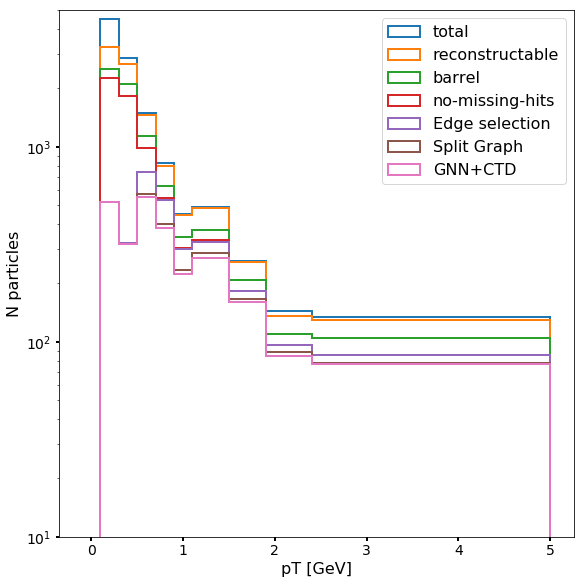

In [385]:
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)
bins = [-0.1, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.5, 1.9, 2.4, 5]
hist_configs = {
    'bins': bins,
    'histtype': 'step',
    'lw': 2,
    'log': True
}

tot_vals, bins, _ = ax.hist(particles['pt'], **hist_configs, label='total')

constructable_vals, bins, _ = ax.hist(particles[particles['particle_id'].isin(np.unique(reconstructable_particles.particle_id))]['pt'],
                                  **hist_configs, label='reconstructable')

bb_vals, bins, _ = ax.hist(particles[particles['particle_id'].isin(barrel_particles)]['pt'], **hist_configs, label='barrel')
miss_hits_vals, bins, _ = ax.hist(particles[particles['particle_id'].isin(bb_no_missing_pids)]['pt'],
                                  **hist_configs, label='no-missing-hits')
graph_forming_vals, bins, _ = ax.hist(particles[particles['particle_id'].isin(n_fully_connected_trks['correct_pids'].values)]['pt'],
                                  **hist_configs, label='Edge selection')
split_graph_vals, bins, _ = ax.hist(particles[particles['particle_id'].isin(n_trks_with_split['correct_pids'].values)]['pt'],
                                  **hist_configs, label='Split Graph')
gnn_vals, bins, _ = ax.hist(particles[particles['particle_id'].isin(n_trks_with_splitGNN['correct_pids'].values)]['pt'],
                                  **hist_configs, label='GNN+CTD')
ax.set_ylabel('N particles', fontsize=fontsize)
ax.set_xlabel('pT [GeV]', fontsize=fontsize)
ax.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)
ax.set_ylim(10, 5000)
ax.legend(fontsize=fontsize)
plt.savefig("number_of_particles_vs_pt.eps")
plt.savefig("number_of_particles_vs_pt.png")

In [316]:
def get_ratio(x_vals, y_vals):
    res = [x/y if y!=0 else 0.0 for x,y in zip(x_vals, y_vals)]
    return res[1:]

In [ ]:
tot_ratio = get_ratio(tot_vals, tot_vals)
constructable_ratio = get_ratio(constructable_vals, tot_vals)
bb_ratio  = get_ratio(bb_vals, tot_vals)
misshits_ratio  = get_ratio(miss_hits_vals, tot_vals)
graphforming_ratio = get_ratio(graph_forming_vals, tot_vals)
graphsplit_ratio = get_ratio(split_graph_vals, tot_vals)
gnn_ratio = get_ratio(gnn_vals, tot_vals)

In [387]:
ratio_dict = {
    "total": tot_ratio, 
    "reconstructable": constructable_ratio,
    "barrel": bb_ratio,
    "no-missing-hits": misshits_ratio,
    'Edge selection': graphforming_ratio,
    'Split Graph': graphsplit_ratio,
    'GNN+CTD': gnn_ratio
}

In [372]:
gnn_ratio2 = get_ratio(gnn_vals, split_graph_vals)
print(gnn_ratio2)

[0.9923518164435946, 0.9968553459119497, 0.968365553602812, 0.955, 0.9527896995708155, 0.9507042253521126, 0.9636363636363636, 0.9438202247191011, 0.9871794871794872]


In [373]:
xvals = [0.5*(x[0]+x[1]) for x in utils_fit.pairwise(bins)][1:]

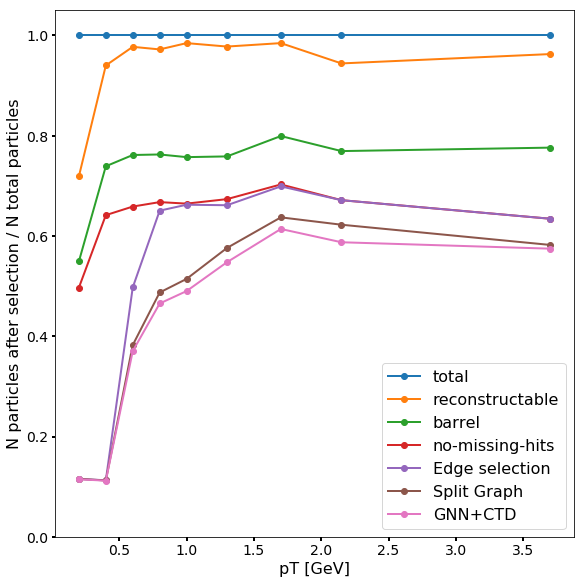

In [384]:
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)

line_configs = {'lw': 2}
lstype = '-o'
ax.plot(xvals, tot_ratio, lstype, **line_configs, label="total")
ax.plot(xvals, constructable_ratio, lstype, **line_configs, label="reconstructable")
ax.plot(xvals, bb_ratio, lstype, **line_configs, label='barrel')
ax.plot(xvals, misshits_ratio, lstype, **line_configs, label='no-missing-hits')
ax.plot(xvals, graphforming_ratio, lstype, **line_configs, label='Edge selection')
ax.plot(xvals, graphsplit_ratio, lstype, **line_configs, label='Split Graph')
ax.plot(xvals, gnn_ratio, lstype, **line_configs, label='GNN+CTD')
ax.set_ylim(0, 1.05)
ax.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)
ax.set_ylabel("N particles after selection / N total particles", fontsize=fontsize)
ax.set_xlabel("pT [GeV]", fontsize=fontsize)
ax.legend(fontsize=fontsize)
plt.savefig("selection_efficiency_vs_particle_pt.eps")
plt.savefig("selection_efficiency_vs_particle_pt.png")

In [396]:
def plot_ratio(x, y_list, labels):
    fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)

    line_configs = {'lw': 2}
    lstype = '-o'
    for y,label in zip(y_list, labels):
        ax.plot(x, y, lstype, **line_configs, label=label)
    ax.set_ylim(0, 1.05)
    ax.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)
    ax.set_ylabel("N particles after selection / N total particles", fontsize=fontsize)
    ax.set_xlabel("pT [GeV]", fontsize=fontsize)
    ax.legend(fontsize=fontsize, loc=4)
    plt.savefig("selection_efficiency_vs_particle_pt_{}.eps".format(label))
    plt.savefig("selection_efficiency_vs_particle_pt_{}.png".format(label))

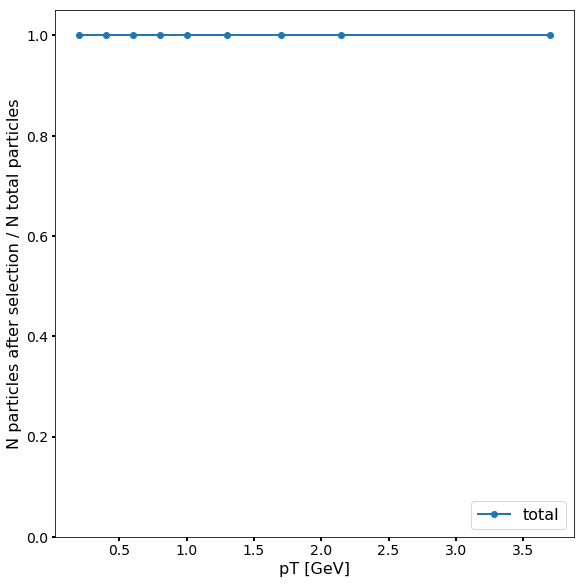

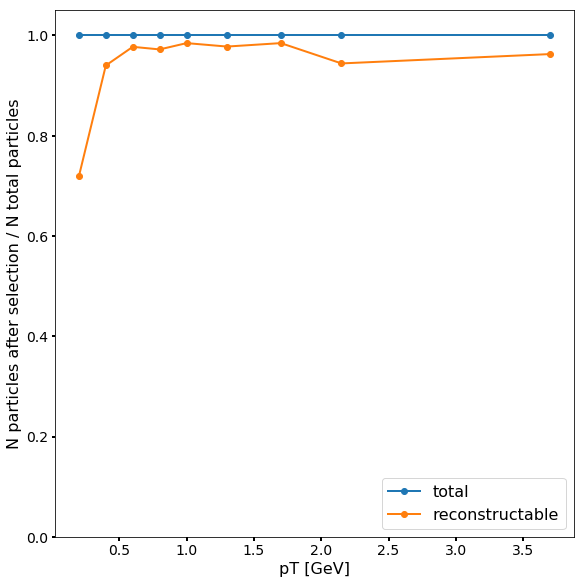

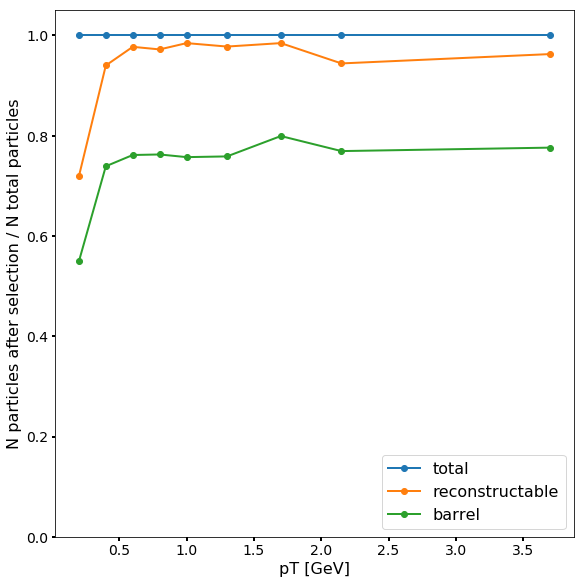

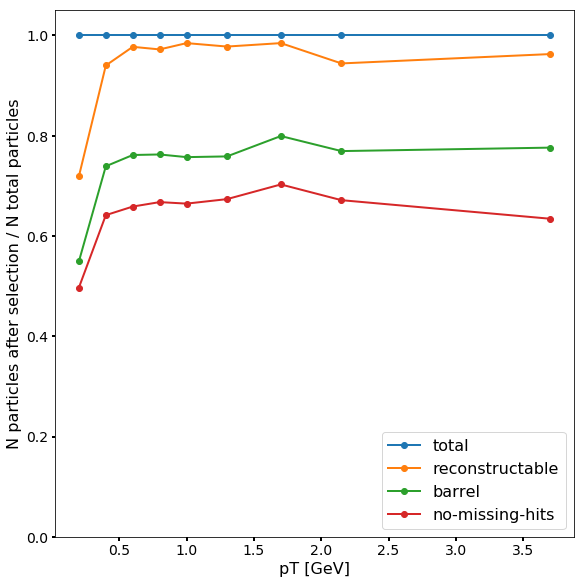

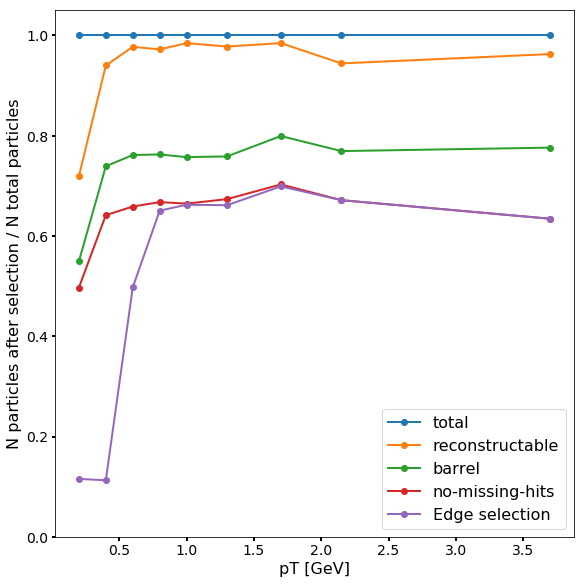

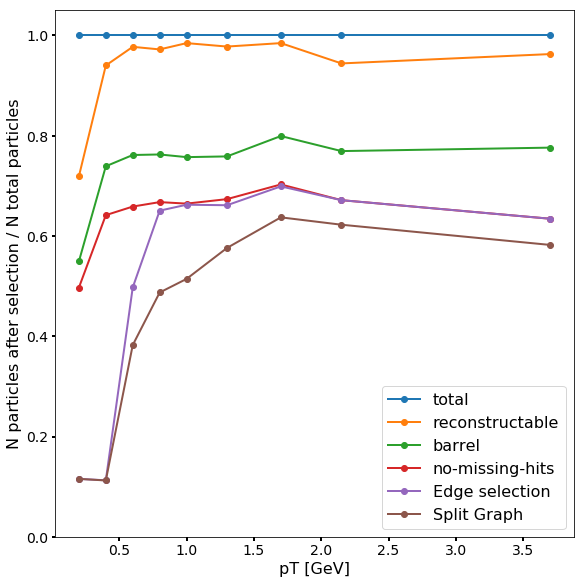

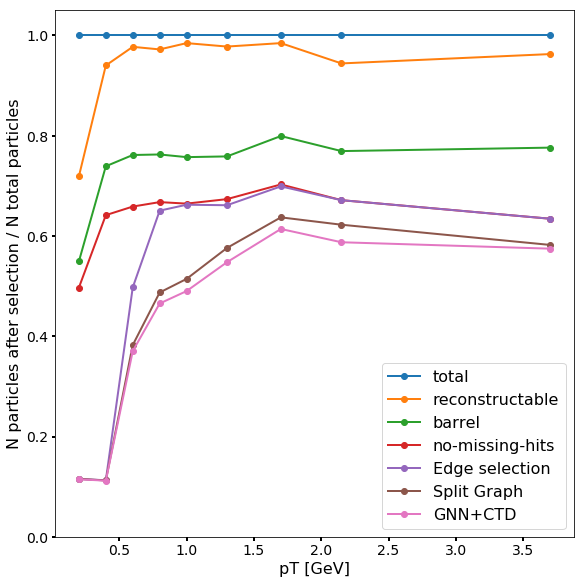

In [397]:
# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']
icolor = 0
ratio_to_plot = []
labels_to_plot = []
for key,value in ratio_dict.items():
    ratio_to_plot.append(value)
    labels_to_plot.append(key)
    plot_ratio(xvals, ratio_to_plot, labels_to_plot)
    icolor += 1

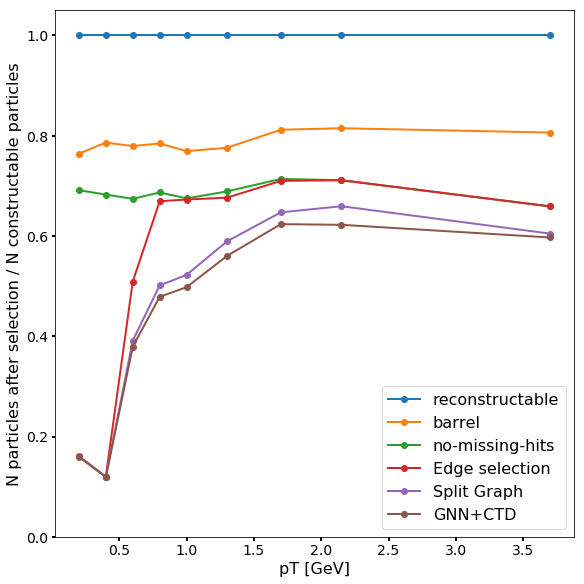

In [383]:
constructable_ratio2 = get_ratio(constructable_vals, constructable_vals)
bb_ratio2  = get_ratio(bb_vals, constructable_vals)
misshits_ratio2  = get_ratio(miss_hits_vals, constructable_vals)
graphforming_ratio2 = get_ratio(graph_forming_vals, constructable_vals)
graphsplit_ratio2 = get_ratio(split_graph_vals, constructable_vals)
gnn_ratio2 = get_ratio(gnn_vals, constructable_vals)


fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)

line_configs = {'lw': 2}
lstype = '-o'
ax.plot(xvals, constructable_ratio2, lstype, **line_configs, label="reconstructable")
ax.plot(xvals, bb_ratio2, lstype, **line_configs, label='barrel')
ax.plot(xvals, misshits_ratio2, lstype, **line_configs, label='no-missing-hits')
ax.plot(xvals, graphforming_ratio2, lstype, **line_configs, label='Edge selection')
ax.plot(xvals, graphsplit_ratio2, lstype, **line_configs, label='Split Graph')
ax.plot(xvals, gnn_ratio2, lstype, **line_configs, label='GNN+CTD')
ax.set_ylim(0, 1.05)
ax.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)
ax.set_ylabel("N particles after selection / N constructable particles", fontsize=fontsize)
ax.set_xlabel("pT [GeV]", fontsize=fontsize)
ax.legend(fontsize=fontsize)
plt.savefig("selection_efficiency_wrt_constructable_vs_particle_pt.eps")
plt.savefig("selection_efficiency_wrt_constructable_vs_particle_pt.png")

No handles with labels found to put in legend.


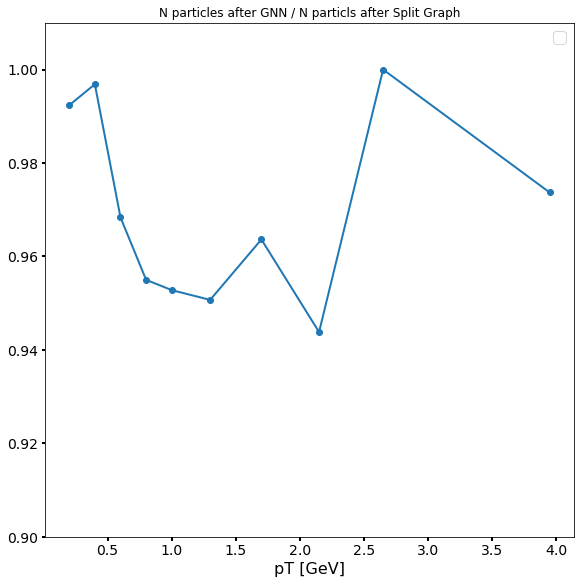

In [331]:
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)

line_configs = {'lw': 2}
lstype = '-o'
ax.plot(xvals, gnn_ratio2, lstype, **line_configs)
ax.set_ylim(0, 1.05)
ax.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)
# ax.set_ylabel("N particles after GNN / N total particles after ", fontsize=fontsize)
ax.set_xlabel("pT [GeV]", fontsize=fontsize)
ax.set_title("N particles after GNN / N particls after Split Graph")
ax.set_ylim(0.9, 1.01)
ax.legend(fontsize=fontsize)